In [ ]:
!unzip 'archive.zip'

Archive:  archive.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#Univariate

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv('test.csv')

x = data.iloc[:,0:20]
y = data.iloc[:,-1]

fitur_terbaik = SelectKBest(score_func=chi2, k=10)
fit = fitur_terbaik.fit(x, y)
data_score = pd.DataFrame(fit.scores_)
data_kolom = pd.DataFrame(x.columns)

skor_fitur = pd.concat([data_kolom,data_score], axis=1)
skor_fitur.columns = ['Spesifikasi', 'Skor-nya']
print(skor_fitur.nlargest(10, 'Skor-nya'))

    Spesifikasi    Skor-nya
13     px_width  852.914979
14          ram  562.837207
0            id  223.566155
12    px_height   46.347162
9     mobile_wt   42.328627
5            fc   15.793117
11           pc   11.148155
7    int_memory    1.372252
3   clock_speed    1.052762
16         sc_w    0.809077


[0.06212389 0.0555699  0.03148873 0.05945442 0.03048222 0.0540517
 0.02496257 0.05548465 0.05641843 0.06054742 0.05211475 0.05618873
 0.05770422 0.06372248 0.0583689  0.05426907 0.05577799 0.05869144
 0.02199101 0.03058747]


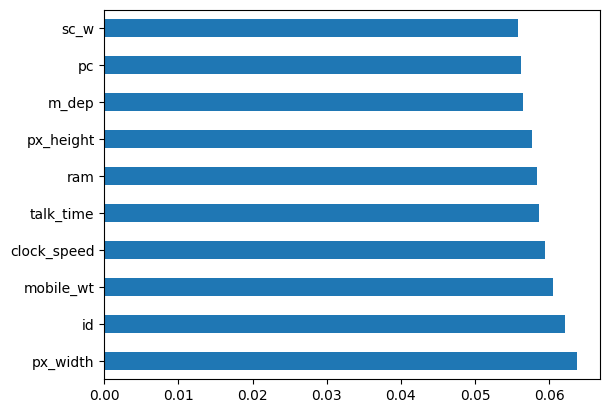

In [ ]:
#Feature_Importance

import pandas as pd
import numpy as np

data = pd.read_csv('test.csv')

x = data.iloc[:,0:20]
y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

print (model.feature_importances_)
kolom_terpenting = pd.Series(model.feature_importances_, index =x.columns)
kolom_terpenting.nlargest(10).plot(kind='barh')
plt.show()

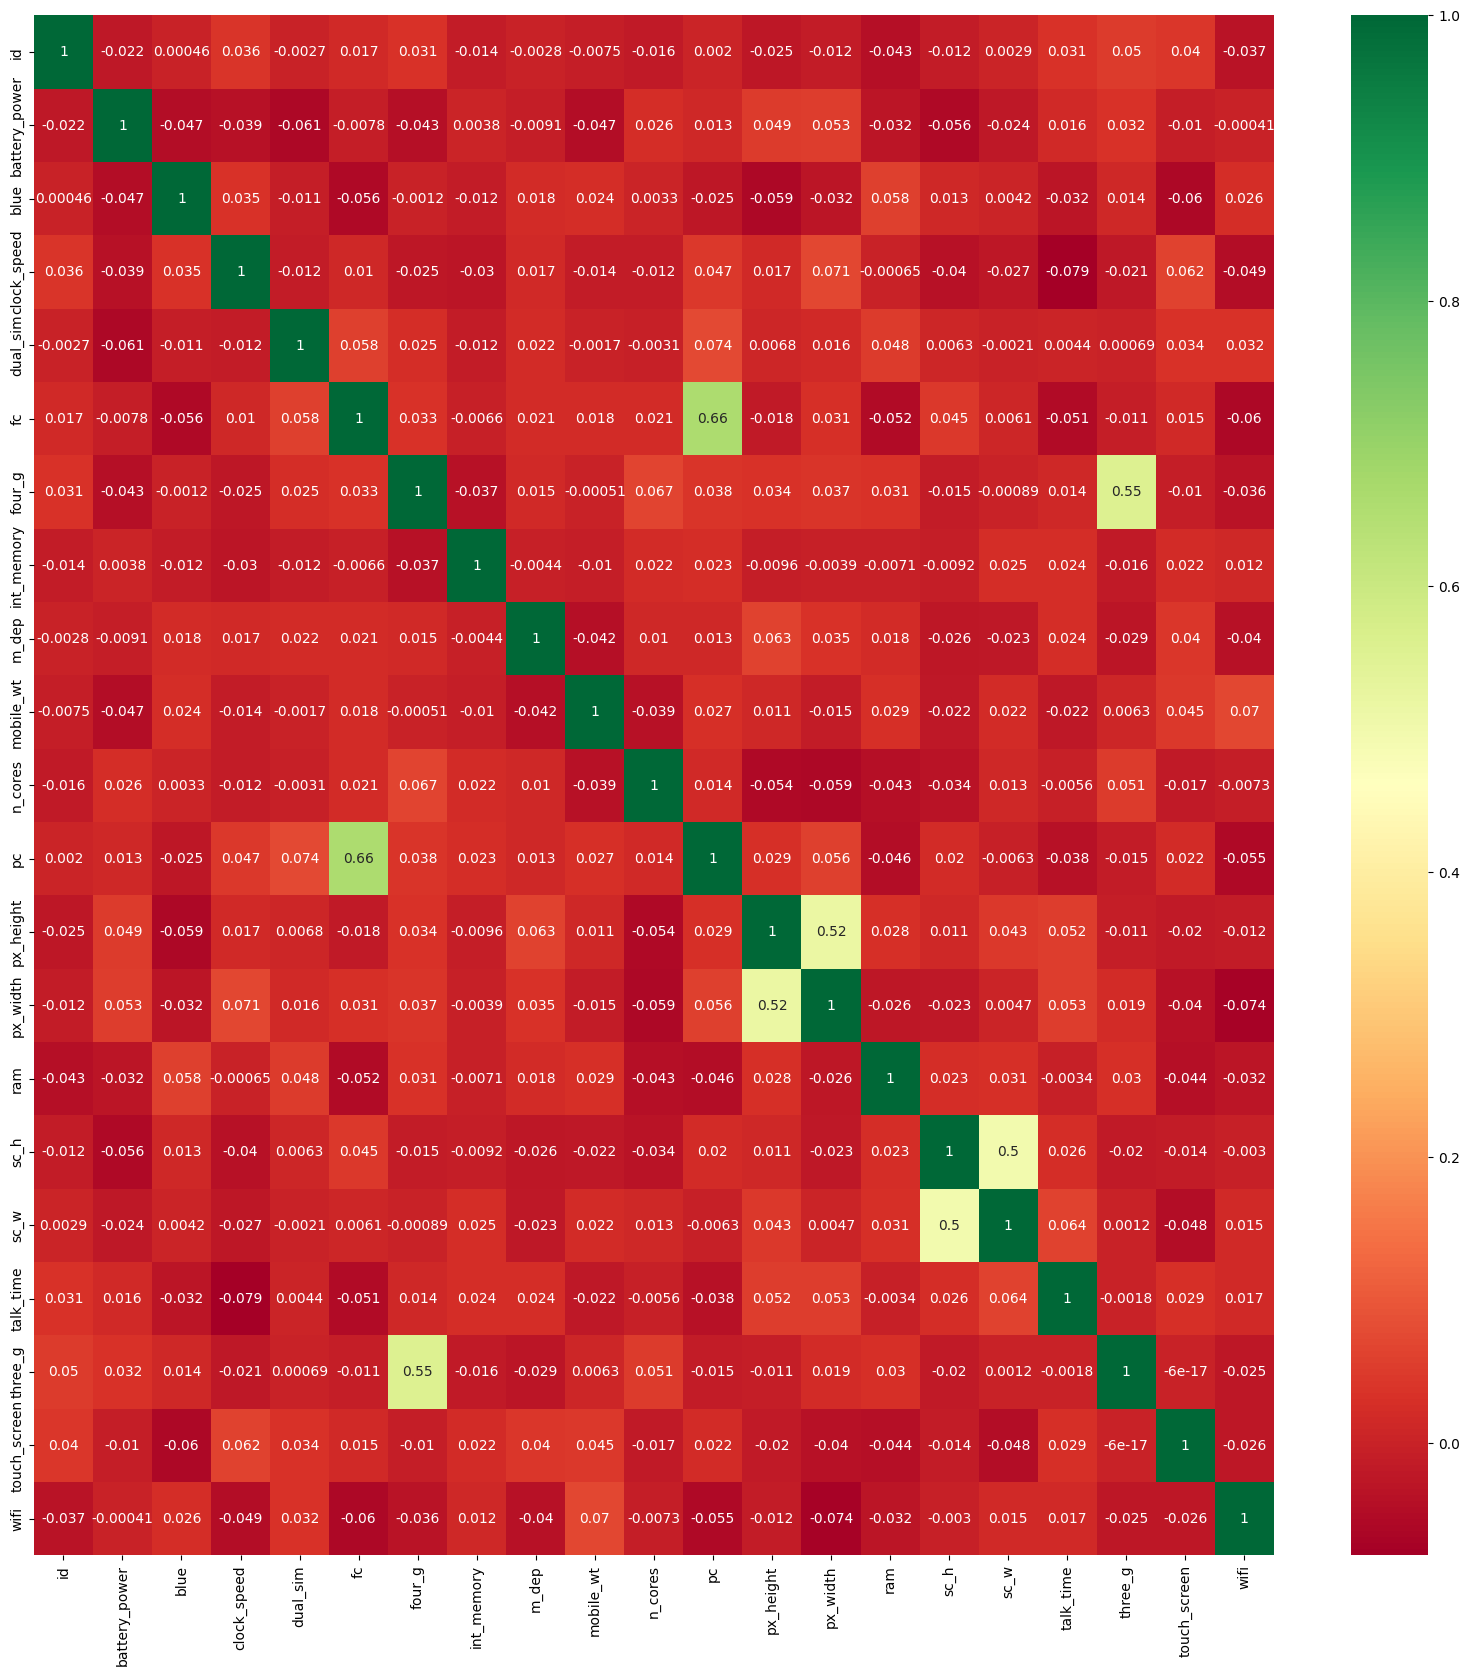

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('test.csv')

x = data.iloc[:,0:20]
y = data.iloc[:,-1]

korelasi = data.corr()
fitur_korelasi_tertinggi = korelasi.index
plt.figure(figsize=(20,20))

g = sns.heatmap(data[fitur_korelasi_tertinggi].corr(), annot=True, cmap="RdYlGn")